In [ ]:
#####
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# データの読み込み
y = h5py.File('P300.mat','r')

# 設定
fs = 256;
eeg_ch = np.arange(8)

In [60]:
######P300に入っている要素名は'y'
data = y['y'].value
y.keys() ##入っているデータの名前の出力の確認

KeysView(<HDF5 file "P300.mat" (mode r)>)

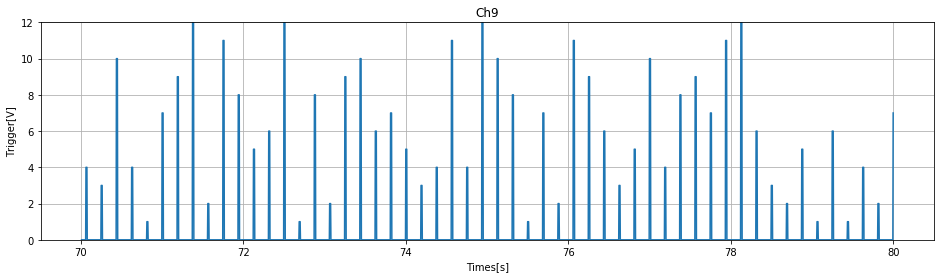

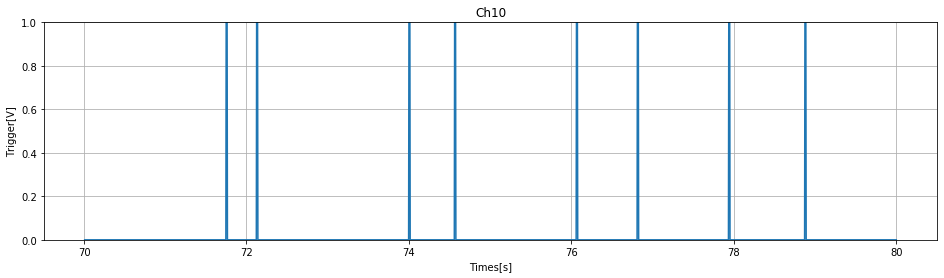

In [61]:
############ 最初の10秒分を削除
data2  = data[256*10+1:len(data),:]


###Ch9の60～70秒のデータ表示
plt.figure(figsize=(16,4))
plt.ylim(0,12)
plt.title("Ch9")
plt.xlabel("Times[s]")
plt.ylabel("Trigger[V]")
plt.grid(True)
plt.plot(data2[60 * fs + 1:70 * fs, 0],data2[60 * fs + 1:70 * fs,9])

###Ch10の60～70秒のデータ表示
plt.figure(figsize=(16,4))
plt.ylim(0,1)
plt.title("Ch10")
plt.xlabel("Times[s]")
plt.ylabel("Trigger[V]")
plt.grid(True)
plt.plot(data2[60 * fs + 1:70 * fs, 0],data2[60 * fs + 1:70 * fs,10])



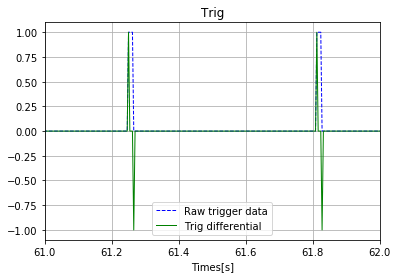

In [62]:
#############ターゲット刺激トリガデータの時間差分データを作る
tmp = data2[1:len(data2), 10] - data2[0:len(data2) - 1,10]

###データ長を合わせるために0を挿入
tdiff = np.insert(tmp, 0, 0)

plt.xlim(61,62)
plt.title("Trig")
plt.xlabel("Times[s]")
plt.grid(True)

###グラフの表示
plt.plot(data2[:,0],data2[:,10],color='blue',  linestyle='dashed', linewidth = 1.0, label="Raw trigger data") ##元のトリガ信号
plt.plot(data2[:,0],tdiff,color='green',  linestyle='solid', linewidth = 1.0, label="Trig differential") ##時間差分データ
plt.legend()

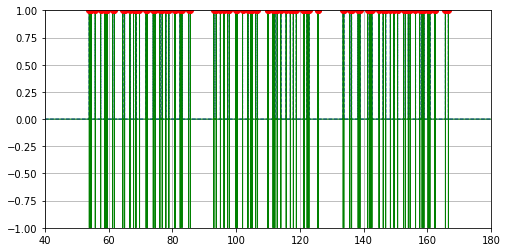

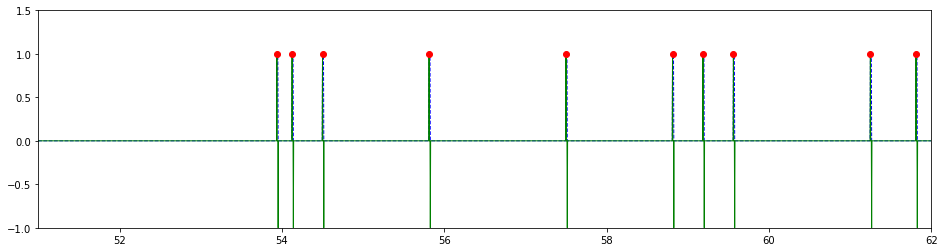

In [63]:
%matplotlib inline
ttrig = np.where(tdiff > 0.8) #tdiff内で0.8より多きい要素の位置をttrigに入れる
ttrig = np.array(ttrig).reshape((-1))
plt.figure(figsize=(8,4))
plt.xlim(40,180)
plt.ylim(-1,1)
plt.grid()
plt.plot(data2[:,0],data2[:,10],color='blue',  linestyle='dashed', linewidth = 1.0, label="Raw trigger data") #ttrigの立ち上がりの時間を表示
plt.plot(data2[:,0],tdiff,color='green',  linestyle='solid', linewidth = 1.0, label="wakaran") #ターゲット刺激に対するトリガのインデックスが抽出できたかの確認
plt.plot(data2[ttrig,0],data2[ttrig,10], color='red',  linestyle='none', marker = 'o')

plt.figure(figsize=(16,4))
plt.xlim(51,62)
plt.ylim(-1,1.5)
plt.plot(data2[:,0],data2[:,10],color='blue',  linestyle='dashed', linewidth = 1.0, label="Raw trigger data") #ttrigの立ち上がりの時間を表示
plt.plot(data2[:,0],tdiff,color='green',  linestyle='solid', linewidth = 1.0, label="wakaran") #ターゲット刺激に対するトリガのインデックスが抽出できたかの確認
plt.plot(data2[ttrig,0],data2[ttrig,10], color='red',  linestyle='none', marker = 'o')



In [64]:
#### target以外のトリガの取り出し
adiff = np.array([data2[1:len(data2),9] - data2[0:len(data2) - 1 ,9]]) #Ch9のトリガデータからすべての光刺激に対するトリガを抽出
adiff = np.insert(adiff,0,0) #先頭に0を挿入
atrig = np.where(adiff > 0.8) #0.8よりも大きい数を代入

flg = np.isin(atrig,ttrig) #atrigとttrigを比較して真偽値で表す
ntrig = np.array(atrig)[np.logical_not(flg)] #falseを抽出

print(ntrig[0 : 20])
print(ttrig[0 : 10])

[10815 10863 10911 10959 11007 11055 11103 11151 11199 11343 11439 11487
 11535 11583 11631 11679 11775 11823 11871 11919]
[11247 11295 11391 11727 12159 12495 12591 12687 13119 13263]


In [ ]:
# data内のtriggerで示される刺激を基準に刺激前-0.1s, 刺激後0.7sのデータを切り出し，加算平均を行う
import numpy as np
def average_wave(data , trigger):
    NCh = 8 #脳波のチャンネル数
    before_time = 0.1 #トリガの前から0.1s = 100msのデータを取る
    after_time = 0.7 #トリガ後は700msとる
    
    tt = np.arange(-1 * before_time , after_time, 1/fs) #加算データの時刻のインデックス
    Nave = len(trigger) #加算平均回数の指定
    print(Nave)
    ###加算平均処理
    bef = round(before_time * fs)
    aft = round(after_time * fs)

    ##加算するための変数tmpを作る
    tmp = np.zeros((len(tt), NCh))
    for ii in range(Nave):
        tmp = tmp + data[trigger[ii] - bef : trigger[ii] + aft, 1 : NCh + 1]
        
    averaged = tmp / Nave

    ###ベースライン処理
    averaged = averaged - averaged[bef,:]
    return averaged


90
450
(205,)


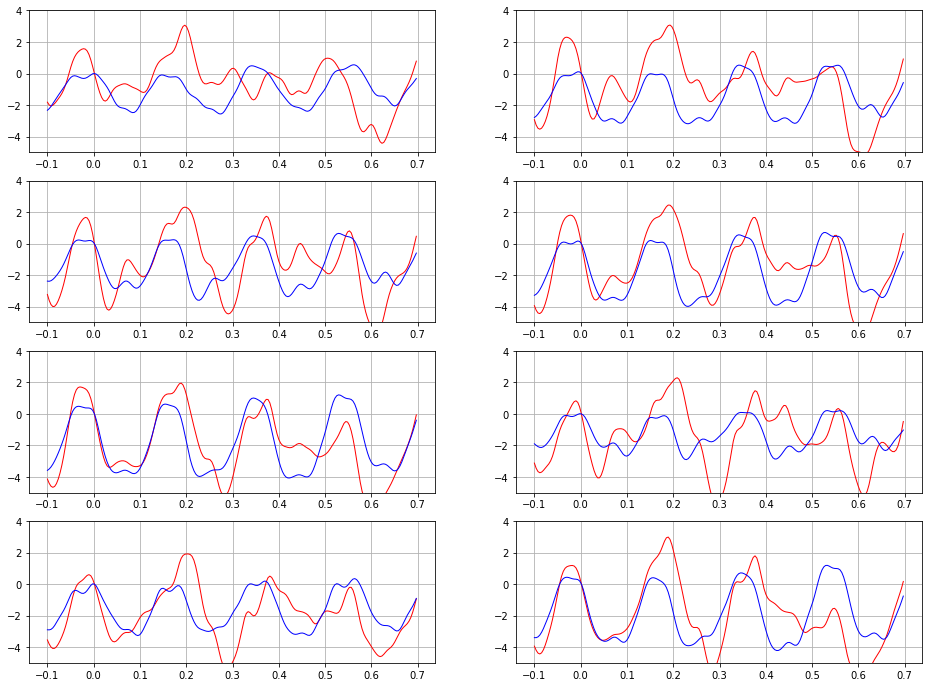

In [66]:
target = average_wave(data2,ttrig)
non_target = average_wave(data2, ntrig)
tt = np.arange(-0.1 , 0.7, 1./256.0)
print(tt.shape)

plt.figure(figsize=(16,12))
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.plot(tt, target[:,i], color='red',  linestyle='solid', linewidth = 1.0, label="all")
    plt.plot(tt, non_target[:,i], color='blue',  linestyle='solid', linewidth = 1.0, label="all")
    plt.ylim((-5, 4))
    plt.grid()

In [67]:
data[2]

array([0.0078125, 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       ])

In [ ]:
def pick_waves(data , trigger, pickCh, before_time=0.1, after_time=0.7):
    # before_time = 0.1 #トリガの前から0.1s = 100sのデータを取る
    # after_time = 0.7 #トリガ後は700sとる
    
    trigger = np.array(trigger)

    Nave = len(trigger) #加算平均回数の指定
    
    ###ポイント数の計算
    bef = round(before_time * fs)
    aft = round(after_time * fs)

    ##波形を取り出す変数pick_epochを作る
    pick_epoch = np.zeros((len(tt), Nave))
    for ii in range(Nave):
        pick_epoch[:,ii] = data[trigger[ii] - bef : trigger[ii] + aft, pickCh]

    return pick_epoch


In [ ]:
import chainer
import chainer.functions as F
import chainer.links as L
import chainer.initializers as I
from chainer import training
from chainer.training import extensions
from sklearn.model_selection import train_test_split

In [70]:
# targetデータの取り出し
X_target = pick_waves(data2, ttrig, 6)
X_target = X_target.transpose()
N_target = len(ttrig)
Y_target = np.ones((N_target,)).astype(np.int32)
print(np.array(X_target).shape)

# non-targetデータの取り出し
X_nontarget = pick_waves(data2,ntrig, 6)
X_nontarget = X_nontarget.transpose()
N_nontarget = len(ntrig)
Y_nontarget = np.zeros((N_nontarget,)).astype(np.int32)
print(np.array(X_nontarget).shape)
print(np.array(Y_nontarget).shape)

# データの結合
X_tmp = np.concatenate([X_target, X_nontarget], axis = 0)
Y_tmp = np.concatenate([Y_target, Y_nontarget], axis = 0)
#Y_tmp = np.identity(2)[Y_tmp]
print(Y_tmp.shape)

(90, 205)
(450, 205)
(450,)
(540,)


In [ ]:
# データの水増し（水平シフト）
import random
X_list = []
Y_list = []
for roop_count in range(5):
    X_tmp_tmp = np.roll(X_tmp, random.randint(5, 25), axis=1)
    X_list.append(X_tmp_tmp)
    Y_list.append(Y_tmp)

for X_tmp_tmp, Y_tmp_tmp in zip(X_list, Y_list):
  X_tmp = np.concatenate([X_tmp, X_tmp_tmp], axis = 0)
  Y_tmp = np.concatenate([Y_tmp, Y_tmp_tmp], axis = 0)
del X_list, Y_list, X_tmp_tmp

In [ ]:
# データの水増し(垂直シフト)
import random
X_list = []
Y_list = []
for roop_count in range(5):
    X_tmp_tmp = X_tmp + random.uniform(-1, 1)
    X_list.append(X_tmp_tmp)
    Y_list.append(Y_tmp)
for X_tmp_tmp, Y_tmp_tmp in zip(X_list, Y_list):
  X_tmp = np.concatenate([X_tmp, X_tmp_tmp], axis = 0)
  Y_tmp = np.concatenate([Y_tmp, Y_tmp_tmp], axis = 0)
del X_list, Y_list, X_tmp_tmp

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_tmp = std.fit_transform(X_tmp)

(205,) (19440, 205) (19440,)


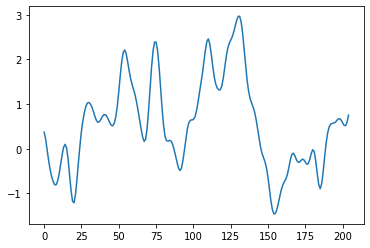

-3.70854383815369e-18


In [74]:
plt.plot(X_tmp[0])
print(X_tmp[0].shape, X_tmp.shape, Y_tmp.shape)
plt.show()
print(X_tmp.mean())

In [75]:
epoch = 150
batchsize = 300

# データの設定　chainer用
X_train, X_test, Y_train, Y_test = train_test_split(X_tmp, Y_tmp,
                                                    test_size=0.3, random_state = 1)
X_train = X_train.reshape(-1, len(X_train[0]))
X_test  = X_test.reshape( -1, len(X_test[0]))
X_train = (X_train).astype(np.float32)
X_test  = (X_test).astype(np.float32)
Y_train = (Y_train).astype(np.int32)
Y_test  = (Y_test).astype(np.int32)
train = chainer.datasets.TupleDataset(X_train, Y_train)
test = chainer.datasets.TupleDataset(X_test, Y_test)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)


(13608, 205) (5832, 205)
(13608,) (5832,)


In [ ]:
class MyChain(chainer.Chain):
    def __init__(self):
        super(MyChain, self).__init__()
        with self.init_scope():
            self.l1 = L.Linear(205, 103)
            self.l2 = L.Linear(103, 51)
            self.l3 = L.Linear(51, 2)
            # self.bnorm1 = L.BatchNormalization(103)
            # self.bnorm2 = L.BatchNormalization(51)
            # self.bnorm3 = L.BatchNormalization(2)

    def __call__(self, x):
        h1 = F.dropout(self.l1(x),ratio = 0.5)
        h2 = F.dropout(self.l2(h1),ratio = 0.7)
        # h1 = F.dropout(self.bnorm1(self.l1(x)),ratio = 0.5)
        # h2 = F.dropout(self.bnorm2(self.l2(h1)),ratio = 0.7)
        # y = self.bnorm3(self.l3(h2))
        y = self.l3(h2)
        return y        


In [ ]:
from chainer.optimizer_hooks import WeightDecay
model = L.Classifier(MyChain(), lossfun=F.softmax_cross_entropy)
optimizer = chainer.optimizers.Adam()
optimizer.setup(model)
# for param in model.params():
#     if param.name != 'b':  # バイアス以外だったら
#         param.update_rule.add_hook(WeightDecay(0.0001))  # 重み減衰を適用
train_iter = chainer.iterators.SerialIterator(train, batchsize)
test_iter = chainer.iterators.SerialIterator(test, batchsize, repeat=False, shuffle=False)
updater = training.StandardUpdater(train_iter, optimizer)
trainer = training.Trainer(updater, (epoch, 'epoch'))

In [ ]:
# 学習状況の表示や保存
trainer.extend(extensions.LogReport())
trainer.extend(extensions.Evaluator(test_iter, model))
trainer.extend(extensions.PrintReport(['epoch', 'main/loss', 'validation/main/loss','main/accuracy', 'validation/main/accuracy', 'elapsed_time'] ))#計算状態の表示
trainer.extend(extensions.dump_graph('main/loss'))
trainer.extend(extensions.PlotReport(['main/loss', 'validation/main/loss'], 'epoch',file_name='loss.png'))
trainer.extend(extensions.PlotReport(['main/accuracy', 'validation/main/accuracy'],'epoch', file_name='accuracy.png'))
trainer.extend(extensions.PrintReport( entries=['epoch', 'main/loss', 'main/accuracy', 'elapsed_time', 'cmrecall', 'cmaccuracy' ]))

In [79]:
trainer.run()
chainer.serializers.save_npz("P300.model", model)

epoch       main/loss   validation/main/loss  main/accuracy  validation/main/accuracy  elapsed_time
epoch       main/loss   main/accuracy  elapsed_time  cmrecall    cmaccuracy
1           0.991499    0.529503              0.568406       0.792348                  0.706573      
1           0.991499    0.568406       0.706573                              
2           0.64852     0.474353              0.671259       0.827727                  1.54391       
2           0.64852     0.671259       1.54391                               
3           0.527641    0.439849              0.757536       0.828182                  2.44341       
3           0.527641    0.757536       2.44341                               
4           0.485698    0.429093              0.800074       0.833606                  3.3171        
4           0.485698    0.800074       3.3171                                
5           0.470751    0.425916              0.814074       0.831394                  4.16396       
5 

In [86]:
print('confusion_matrix')
print(Y_test.shape)
tp = 0
fp = 0
tn = 0
fn = 0

confusion_matrix
(5832,)


In [87]:
27/162 - 1

-0.8333333333333334

In [89]:
print(X_test.shape)
for i in range(len(X_test)): 
    val = chainer.Variable(X_test[i].reshape(1,205))
    result = F.softmax(model.predictor(val))
    # print(result)
    if result.data.argmax() == Y_test[i] and result.data.argmax() == 1:
        tp += 1
    elif result.data.argmax() == Y_test[i] and result.data.argmax() == 0:
        tn += 1
    elif result.data.argmax() != Y_test[i] and result.data.argmax() == 0:
        fn += 1
    else:
        fp += 1

print("[tp,fn],[fp,tn]")
a = 162 * 36
print([[round(tp/a, 3),round(fn/a, 3)],[round(fp/a, 3),round(tn/a, 3)]])


precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)
print("precision: " + str(precision))
print("recall: " + str(recall))
print("f1: " + str(f1))

(5832, 205)
[tp,fn],[fp,tn]
[[0.011, 0.158], [0.011, 0.819]]
precision: 0.5075757575757576
recall: 0.06774519716885744
f1: 0.11953612845673506
